In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
%matplotlib inline

## Generalized Periodogram: 
* Theory/math detailed in [Zechmeister & Kürster, 2009](https://arxiv.org/abs/0901.2573)
* Code detailed [here](https://docs.astropy.org/en/stable/timeseries/lombscargle.html#id25)

### Note about units:
* Time units match what you put in (i.e., if times in days, frequency will be 1/days; if time in sec, frequency will be in Hz)
* Amplitude units can be whatever (e.g., flux, mag)

Text(0, 0.5, 'Signal')

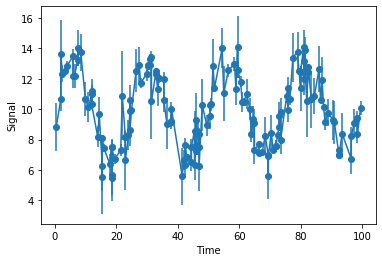

In [33]:
#simulated some unevenly spaced, periodic, noisy data with period of 25
times=np.arange(0, 100, 0.5)
times_uneven=np.sort(np.random.choice(times,150))
flux=3*np.sin(times_uneven*2*np.pi/25.)+10
noise = 1*np.random.normal(0, 1, flux.shape)
signal = flux + noise

#plot our signal
fig=plt.plot()
plt.errorbar(times_uneven,signal,yerr=noise,marker='o')
plt.xlabel('Time')
plt.ylabel('Signal')



Best fit period is:  25.384615384615387
Probability of getting this peak if no peridoic signal:  0.0


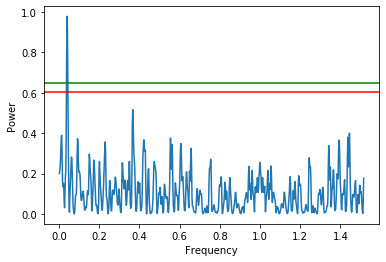

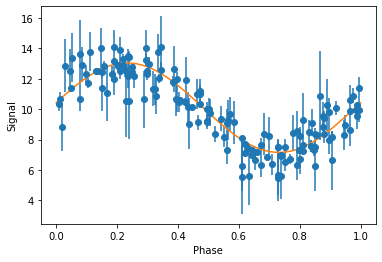

In [35]:
#compute periodogram of signal
frequency, power = LombScargle(times_uneven, signal,noise).autopower(nyquist_factor=2,normalization='standard')

#compute false alarm probs
ls = LombScargle(times_uneven, signal,noise)
probabilities = [0.1, 0.05, 0.01]
prob_vals=ls.false_alarm_level(probabilities,method='bootstrap')
prob_max=ls.false_alarm_probability(power.max(),method='bootstrap')

#plot periodgogram
fig=plt.figure()
plt.plot(frequency, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.axhline(y=prob_vals[1],color='r')#95% sig
plt.axhline(y=prob_vals[2],color='g')#99% sig

#plot phased up signal with periodogram model on top
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1,100)
ls = LombScargle(times_uneven, signal,noise)
y_fit = ls.model(t_fit/best_frequency, best_frequency)
phase = (times_uneven*best_frequency) % 1

fig=plt.figure()
plt.errorbar(phase,signal,yerr=noise,marker='o',ls='')
plt.plot(t_fit,y_fit)
plt.xlabel('Phase')
plt.ylabel('Signal')

print('Best fit period is: ',1./best_frequency)
print('Probability of getting this peak if no periodic signal: ',prob_max)


